<h1><center>IST664 Natural Language Processing</center></h1>
<h2><center>Fake News Detection</center></h2>
<h3><center>Bhavish Kumar, Pranav Kottoli Radhakrishna, Tejas Dinesh Patil</center></h3>

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report,f1_score, accuracy_score, recall_score, roc_auc_score, roc_curve
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import the Data

In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_real = pd.read_csv("True.csv")

# Data Preparation

**Let's create a target variable based on the file from which the data was imported. Using 0 for fake and 1 for real**

In [ ]:
df_fake['Target'] = [0] * len(df_fake)
df_fake.head()

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df_real['Target'] = [1] * len(df_real)
df_real.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


**Now, let's merge the two dataframes and shuffle the results**

In [ ]:
df  = pd.concat([df_real,df_fake])
df = shuffle(df)
df.head()

,title,text,subject,date,Target
13787,WATCH: Hispanic Parents Make Shocking Video Te...,This video exposes the underbelly of the illeg...,politics,"May 31, 2016",0
11517,MULTI-MILLIONAIRE Global-Warming Hypocrites LE...,Enjoy:,politics,"Mar 2, 2017",0
14848,South China Sea code of conduct talks to be 's...,MANILA (Reuters) - China s agreement to begin ...,worldnews,"November 14, 2017",1
21340,Britain will not pay 'a penny more' than it th...,LONDON (Reuters) - Britain will pay not a pen...,worldnews,"August 25, 2017",1
17221,"Chaotic response to Somali bombing cost lives,...",MOGADISHU (Reuters) - Medics who rushed to hel...,worldnews,"October 17, 2017",1


In [ ]:
df.shape

(44898, 5)

## Exploratory Data Analysis

**We find that the two files have completely different values in the subject column. This can lead to issues as the model will directly predict the target class based on this feature. Therefore, it must be removed**

In [ ]:
df_real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [ ]:
df_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
df.drop(axis = 1,labels='subject',inplace = True)

In [ ]:
df.head()

,title,text,date,Target
13787,WATCH: Hispanic Parents Make Shocking Video Te...,This video exposes the underbelly of the illeg...,"May 31, 2016",0
11517,MULTI-MILLIONAIRE Global-Warming Hypocrites LE...,Enjoy:,"Mar 2, 2017",0
14848,South China Sea code of conduct talks to be 's...,MANILA (Reuters) - China s agreement to begin ...,"November 14, 2017",1
21340,Britain will not pay 'a penny more' than it th...,LONDON (Reuters) - Britain will pay not a pen...,"August 25, 2017",1
17221,"Chaotic response to Somali bombing cost lives,...",MOGADISHU (Reuters) - Medics who rushed to hel...,"October 17, 2017",1


## TF-IDF

In [ ]:
X = df.drop('Target',axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(encoding='utf-8', stop_words='english', lowercase=True,max_features=2000)
vec = vectorizer.fit(X_train['text'])
vectors_text = vec.transform(X_train['text'])
vectors_title = vec.transform(X_train['title'])

In [ ]:
feature_names = vectorizer.get_feature_names()
dense_text = vectors_text.todense().tolist()
df_text = pd.DataFrame(dense_text, columns=feature_names)

In [ ]:
feature_names = []
for name in vectorizer.get_feature_names():
    feature_names.append("title_" + name)
dense_title = vectors_title.todense().tolist()
df_title = pd.DataFrame(dense_title, columns=feature_names)

In [ ]:
X_train = pd.concat([df_text, df_title], axis=1, sort=False)
X_train.head()

,000,10,100,11,12,13,14,15,16,17,18,19,20,200,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,21,21st,21wire,22,23,24,25,26,27,28,29,30,300,31,35,...,title_wikileaks,title_willing,title_win,title_wing,title_winning,title_wire,title_wisconsin,title_woman,title_women,title_won,title_wonder,title_word,title_words,title_work,title_worked,title_workers,title_working,title_works,title_world,title_worried,title_worse,title_worst,title_worth,title_wouldn,title_wounded,title_writing,title_written,title_wrong,title_wrote,title_xi,title_year,title_years,title_yemen,title_yes,title_yesterday,title_york,title_young,title_youtube,title_zero,title_zone
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.053205,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.023644,0.026153,0.0,0.030058,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.039402,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.015108,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.02144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030603,0.0,0.0,0.0,0.0,0.0,0.013248,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225547,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.016325,0.0,0.000000,0.0,0.020783,0.0,0.0,0.0,0.021199,0.000000,0.0,0.017125,0.0,0.0,0.0,0.0,0.021909,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062972,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.335369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectors_text = vec.transform(X_test['text'])
vectors_title = vec.transform(X_test['title'])

In [ ]:
feature_names = vectorizer.get_feature_names()
dense_text = vectors_text.todense().tolist()
df_text = pd.DataFrame(dense_text, columns=feature_names)

In [ ]:
feature_names = []
for name in vectorizer.get_feature_names():
    feature_names.append("title_" + name)
dense_title = vectors_title.todense().tolist()
df_title = pd.DataFrame(dense_title, columns=feature_names)

In [ ]:
X_test = pd.concat([df_text, df_title], axis=1, sort=False)
X_test.head()

,000,10,100,11,12,13,14,15,16,17,18,19,20,200,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,21,21st,21wire,22,23,24,25,26,27,28,29,30,300,31,35,...,title_wikileaks,title_willing,title_win,title_wing,title_winning,title_wire,title_wisconsin,title_woman,title_women,title_won,title_wonder,title_word,title_words,title_work,title_worked,title_workers,title_working,title_works,title_world,title_worried,title_worse,title_worst,title_worth,title_wouldn,title_wounded,title_writing,title_written,title_wrong,title_wrote,title_xi,title_year,title_years,title_yemen,title_yes,title_yesterday,title_york,title_young,title_youtube,title_zero,title_zone
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.031007,0.0,0.035636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.033207,0.0,0.0353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.059743,0.033042,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034661,0.0,0.0,0.0,0.0,0.0,0.040433,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Modeling

**Let's create a function to plot an ROC and calculate the AUC**

In [ ]:
def generate_roc(model,y_test,model_name):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('{}: ROC AUC=%.3f'.format(model_name) % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.figure(figsize=(16,8))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

### Naive Bayes

**Here we try naive bayes with 3 different distributions. We find that Bernoulli Naive Bayes provides the best results**

**Gaussian**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred = gnb.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
print("F1 Score: ",f1_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      7002
           1       0.93      0.91      0.92      6468

    accuracy                           0.92     13470
   macro avg       0.92      0.92      0.92     13470
weighted avg       0.92      0.92      0.92     13470

Accuracy Score:  0.9204157386785449
Recall Score:  0.9069264069264069
F1 Score:  0.9162761636988441


Predicted,0,1,All
True,,,
0,6532,470,7002
1,602,5866,6468
All,7134,6336,13470


**Multinomial**

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred = mnb.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
print("F1 Score: ",f1_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7002
           1       0.94      0.92      0.93      6468

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470

Accuracy Score:  0.9374164810690423
Recall Score:  0.9242424242424242
F1 Score:  0.934135479334323


Predicted,0,1,All
True,,,
0,6649,353,7002
1,490,5978,6468
All,7139,6331,13470


**Bernoulli**

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
pred = bnb.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
print("F1 Score: ",f1_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7002
           1       0.97      0.96      0.97      6468

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470

Accuracy Score:  0.9671863400148478
Recall Score:  0.9645949288806431
F1 Score:  0.9657894736842105


Predicted,0,1,All
True,,,
0,6789,213,7002
1,229,6239,6468
All,7018,6452,13470


**Bernoulli Naive Bayes provides the best results. The ROC curve for this model can be seen below**

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.993


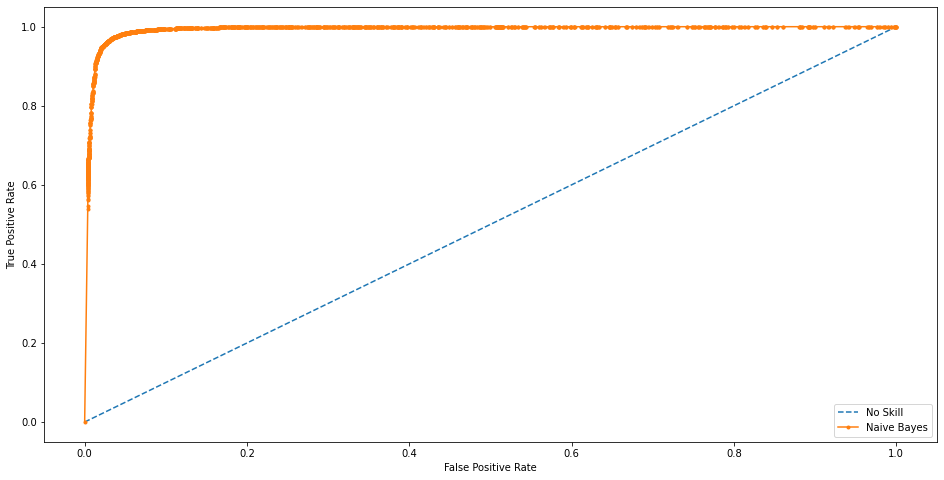

In [ ]:
generate_roc(bnb,y_test,'Naive Bayes')

### Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=16)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=16, verbose=0,
                       warm_start=False)

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
print("F1 Score: ",f1_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7002
           1       1.00      1.00      1.00      6468

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

Accuracy Score:  0.9974758723088345
Recall Score:  0.9973716759431045
F1 Score:  0.9973716759431045


Predicted,0,1,All
True,,,
0,6985,17,7002
1,17,6451,6468
All,7002,6468,13470


**Optimization**

In [ ]:
param_grid = {'n_estimators': [100],
              'max_depth': list(range(2,15)),
              'min_samples_split' :[5,8,15],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [3,4,5,6,7,8]
             }
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy',cv = 6,verbose=1,n_jobs=4)
gs.fit(X_train, y_train)

Fitting 6 folds for each of 468 candidates, totalling 2808 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 27.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 67.6min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 145.7min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 208.1min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 304.3min
[Parallel(n_jobs=4)]: Done 2808 out of 2808 | elapsed: 381.9min finished


GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
print(gs.best_score_)

0.9930314970609477


In [ ]:
for hps, values in gs.best_params_.items():
    print(f"{hps}: {values}")

criterion: gini
max_depth: 14
min_samples_leaf: 3
min_samples_split: 5
n_estimators: 100


In [ ]:
pred = gs.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
print("F1 Score: ",f1_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6954
           1       0.99      1.00      0.99      6515

    accuracy                           0.99     13469
   macro avg       0.99      0.99      0.99     13469
weighted avg       0.99      0.99      0.99     13469

Accuracy Score:  0.9931695003341006
Recall Score:  0.9966231772831926
F1 Score:  0.992965285211806


Predicted,0,1,All
True,,,
0,6884,70,6954
1,22,6493,6515
All,6906,6563,13469


**The baseline random forest model produces the best results, the ROC curve for this model can be seen below**

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=1.000


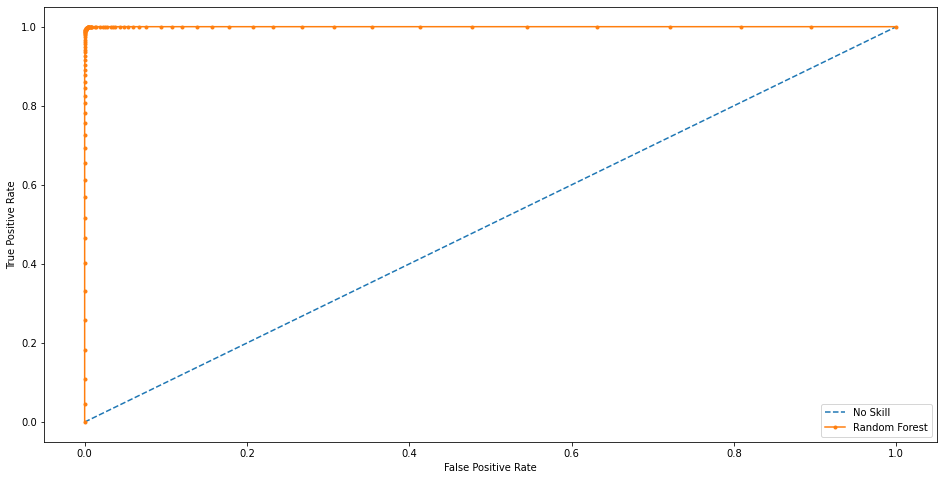

In [ ]:
generate_roc(rfc,y_test,'Random Forest')

**The importance of the features can be seen below**

In [ ]:
importances = rfc.feature_importances_
features = X_train.columns

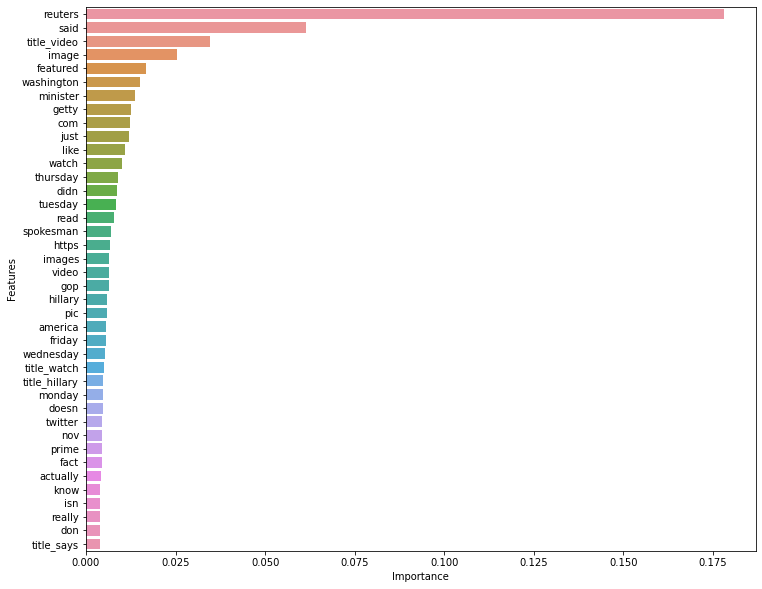

In [ ]:
d = {'Features':features,'Importance':importances}
df_feature = pd.DataFrame(d)
df_feature.sort_values(by="Importance",ascending=False,inplace=True)
df_feature.head()
df_feature = df_feature.head(40)
plt.figure(figsize = (12,10))
sns.barplot(x= "Importance",y="Features",data=df_feature)

### Gradient Boosting

In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred = gbm.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
print("F1 Score: ",f1_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7002
           1       0.99      1.00      1.00      6468

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

Accuracy Score:  0.9952487008166295
Recall Score:  0.99860853432282
F1 Score:  0.9950700970574643


Predicted,0,1,All
True,,,
0,6947,55,7002
1,9,6459,6468
All,6956,6514,13470


**Optimization**

In [ ]:
param_grid = {'n_estimators': [100],
              'max_depth': list(range(13,16)),
              'min_samples_split' : [7,8,9],
              'max_features':list(range(17,24,2)),
              'learning_rate': [0.2,0.25]
            }

gs = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='accuracy',cv = 6,verbose=1,n_jobs = 4)
gs.fit(X_train, y_train)

Fitting 6 folds for each of 72 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 21.0min
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed: 47.1min finished


GridSearchCV(cv=6, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
print(gs.best_score_)

0.9963408425607739


In [ ]:
for hps, values in gs.best_params_.items():
    print(f"{hps}: {values}")

learning_rate: 0.25
max_depth: 14
max_features: 23
min_samples_split: 8
n_estimators: 100


In [ ]:
pred = gs.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
print("F1 Score: ",f1_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7002
           1       1.00      1.00      1.00      6468

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

Accuracy Score:  0.9976243504083148
Recall Score:  0.9990723562152134
F1 Score:  0.9975301018832973


Predicted,0,1,All
True,,,
0,6976,26,7002
1,6,6462,6468
All,6982,6488,13470


No Skill: ROC AUC=0.500
Gradient Boosting: ROC AUC=1.000


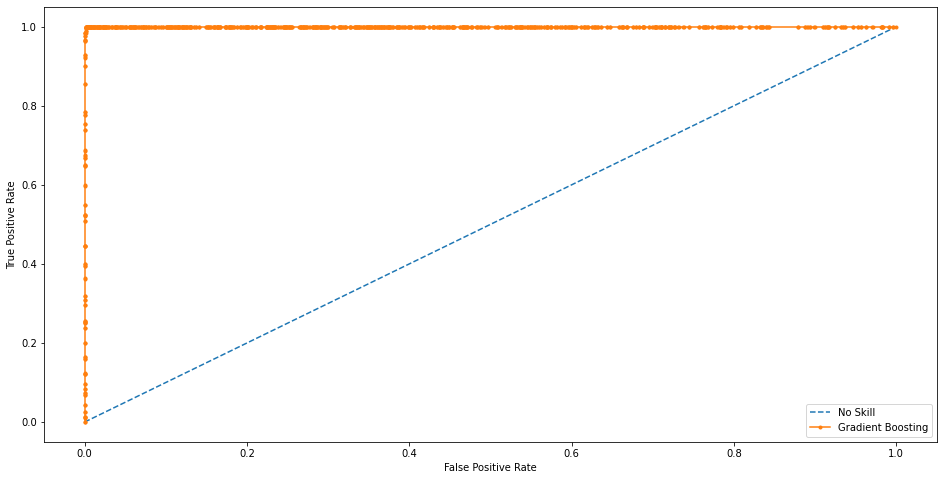

In [ ]:
generate_roc(gs.best_estimator_,y_test,"Gradient Boosting")

**The importance of the features can be seen below**

In [ ]:
importances = gs.best_estimator_.feature_importances_
features = X_train.columns

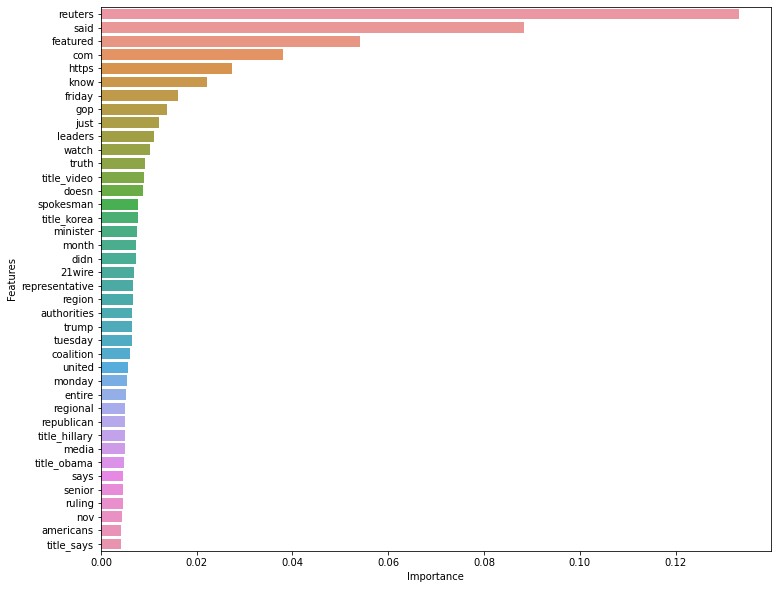

In [ ]:
d = {'Features':features,'Importance':importances}
df_feature = pd.DataFrame(d)
df_feature.sort_values(by="Importance",ascending=False,inplace=True)
df_feature.head()
df_feature = df_feature.head(40)
plt.figure(figsize = (12,10))
sns.barplot(x= "Importance",y="Features",data=df_feature)

# Conclusion

**In conclusion, We find that all 3 models work extremely well with random forest and gradient boosting providing the best performance. Naive Bayes also provides good results and has a lower time complexity due to which it deserves consideration as well**